<a href="https://colab.research.google.com/github/Ashutosh-Gairola/AAIES/blob/main/Assignment13_SVM_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python program to implement Credit Card Fraud detection using Support Vector Machine classification.

Link for the Dataset:

https://raw.githubusercontent.com/Ashutosh-Gairola/I-AI-ML/main/card_transdata.csv

## The Code

In [4]:
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from sklearn import svm



In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/Ashutosh-Gairola/I-AI-ML/main/card_transdata.csv')
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [7]:
df.shape

(1000000, 8)

In [8]:
df=df.dropna()

In [9]:
df=df.drop_duplicates()

In [10]:
df1=df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']]

In [11]:
for col in df1.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

<ipython-input-11-3c62fc7c01f8>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
<ipython-input-11-3c62fc7c01f8>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]


In [12]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [13]:
df.shape

(718686, 8)

<Axes: ylabel='count'>

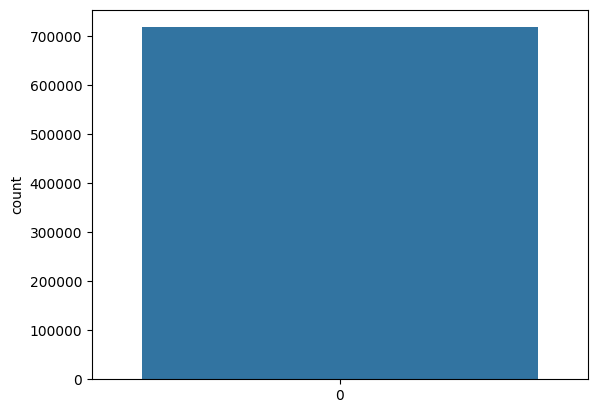

In [14]:
sns.countplot(df['fraud'])

In [15]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,718686.000000,718686.000000,718686.000000,718686.000000,718686.000000,718686.000000,718686.000000,718686.000000
mean,13.212489,1.491409,1.214578,0.867852,0.350529,0.100546,0.650756,0.012512
std,13.182287,1.765700,1.013669,0.338652,0.477136,0.300727,0.476732,0.111154
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.439834,0.246625,0.442329,1.000000,0.000000,0.000000,0.000000,0.000000
50%,8.301386,0.753125,0.888475,1.000000,0.000000,0.000000,1.000000,0.000000
75%,18.675727,2.068070,1.703438,1.000000,1.000000,0.000000,1.000000,0.000000
max,58.542735,7.946092,4.523808,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
x=df.drop('fraud',axis=1)
y=df['fraud']

In [ ]:
x.head()

In [18]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
smote=SMOTE(random_state=2)
x,y=smote.fit_resample(x_train,y_train)
y.value_counts()

1.0    496732
0.0    496732
Name: fraud, dtype: int64

In [21]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale', degree=3,
              class_weight={0: 1.0, 1: 2.0}, tol=0.001)

In [22]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9980937450720295


<Axes: >

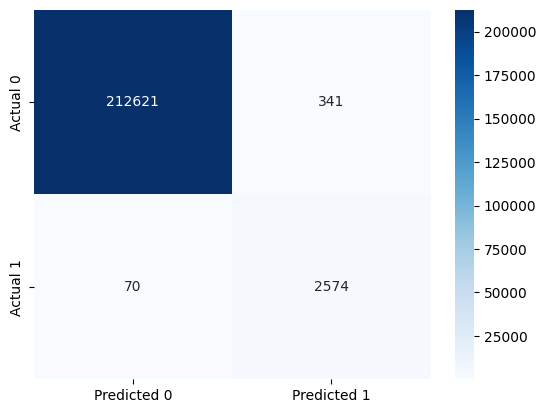

In [23]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [28]:
# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Precision: 0.8830188679245283
Recall: 0.9735249621785174
F1 Score: 0.9260658391797086
